In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv',skipinitialspace = True)


In [3]:
pd.set_option("display.max_columns", None)

In [4]:
df.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [5]:
df.shape

(32560, 15)

In [6]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

-There seems to be no null values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [9]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [10]:
pd.set_option("display.max_rows", None)


In [11]:
for i in df.columns:
    if df[i].dtype =='object':
        print(df[i].value_counts())
        print('='*100)
        

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Workclass, dtype: int64
HS-grad         10501
Some-college     7291
Bachelors        5354
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: Education, dtype: int64
Married-civ-spouse       14976
Never-married            10682
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: Marital_status, dtype: int64
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         376

- while checking the classification in each categorical column, we do do see few with '?' which will be handled
- there are too many classifications in some of the categories which could be clubbed together into one

In [12]:
df['Income'].value_counts()

<=50K    24719
>50K      7841
Name: Income, dtype: int64

In [13]:
df[df['Workclass']== 'State-gov']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
10,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
33,22,State-gov,311512,Some-college,10,Married-civ-spouse,Other-service,Husband,Black,Male,0,0,15,United-States,<=50K
47,41,State-gov,101603,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
122,29,State-gov,267989,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,>50K
166,46,State-gov,102628,Masters,14,Widowed,Protective-serv,Unmarried,White,Male,0,0,40,United-States,<=50K
170,28,State-gov,175325,HS-grad,9,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,<=50K
173,28,State-gov,149624,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K
188,58,State-gov,109567,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,1,United-States,>50K
203,37,State-gov,48211,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,0,0,35,United-States,<=50K
234,59,State-gov,268700,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,United-States,<=50K


In [14]:
df[df['Marital_status']== 'Married-spouse-absent']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
174,27,Private,253814,HS-grad,9,Married-spouse-absent,Sales,Unmarried,White,Female,0,0,25,United-States,<=50K
347,56,Private,101128,Assoc-acdm,12,Married-spouse-absent,Other-service,Not-in-family,White,Male,0,0,25,Iran,<=50K
363,22,Private,410439,HS-grad,9,Married-spouse-absent,Sales,Not-in-family,White,Male,0,0,55,United-States,<=50K
431,40,Self-emp-not-inc,204116,Bachelors,13,Married-spouse-absent,Prof-specialty,Not-in-family,White,Female,2174,0,40,United-States,<=50K
462,50,Private,193374,1st-4th,2,Married-spouse-absent,Craft-repair,Unmarried,White,Male,0,0,40,United-States,<=50K
482,41,Private,193626,HS-grad,9,Married-spouse-absent,Craft-repair,Unmarried,White,Female,0,0,40,United-States,<=50K
484,25,Private,189775,Some-college,10,Married-spouse-absent,Adm-clerical,Own-child,Black,Female,0,0,20,United-States,<=50K
509,49,Private,141944,Assoc-voc,11,Married-spouse-absent,Handlers-cleaners,Unmarried,White,Male,0,1380,42,United-States,<=50K


In [15]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


- if we look at Capital_gain and Capital_loss atleast 75% of the data is 0.

In [16]:
df.replace('?',np.nan,inplace=True)
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

- now '?' has been replaced by null values and the missing values requires to be handled

In [17]:
df[['Education','Education_num']].groupby(df['Education'],as_index=True).mean().sort_values('Education_num')

,Education_num
Education,
Preschool,1.0
1st-4th,2.0
5th-6th,3.0
7th-8th,4.0
9th,5.0
10th,6.0
11th,7.0
12th,8.0
HS-grad,9.0


- from this we can refer that Education_num is an encoded version of Education

Text(0.5, 1.0, 'Assoc-voc vs income')

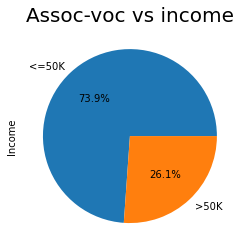

In [18]:
a=df[df['Education']== 'Assoc-voc']
vc = a.Income.value_counts()
a.Income.value_counts().plot(kind='pie',autopct='%1.1f%%',labels=vc.index)
plt.title('Assoc-voc vs income',fontsize= 20)

Text(0.5, 1.0, 'Assoc-acdm vs income')

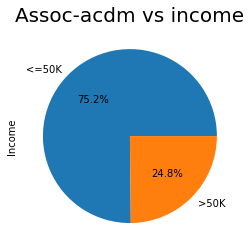

In [19]:
a=df[df['Education']== 'Assoc-acdm']
vc = a.Income.value_counts()
a.Income.value_counts().plot(kind='pie',autopct='%1.1f%%',labels=vc.index)
plt.title('Assoc-acdm vs income',fontsize= 20)

- Asso-voc and Assoc-acdm shows similar trends in income, hence clubbing them together.

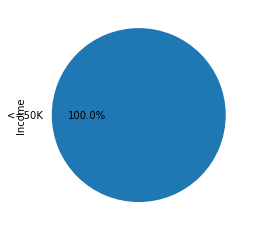

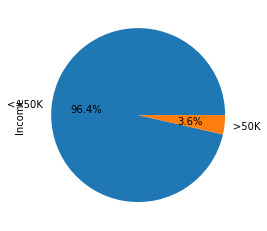

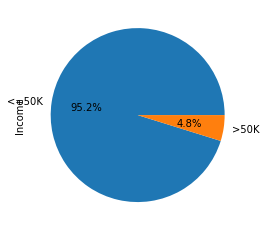

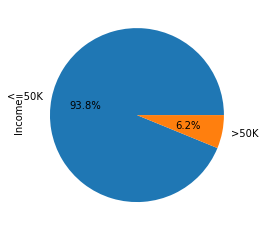

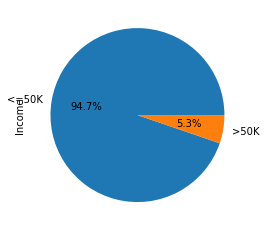

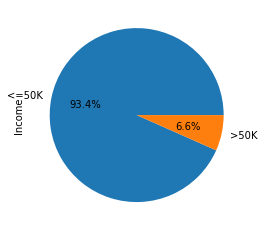

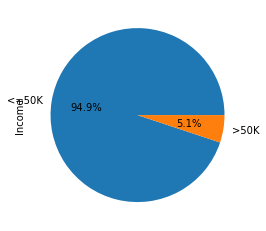

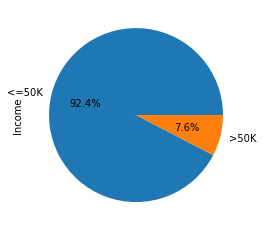

In [20]:
school=['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th']
for i in school:
    fig, ax = plt.subplots()
    a=df[df['Education']== i]
    vc = a.Income.value_counts()
    a.Income.value_counts().plot(kind='pie',autopct='%1.1f%%',labels=vc.index)
    plt.tight_layout
    plt.show()
     

-'Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th' all have shown to earn above 50K by below 10% people

Text(0.5, 1.0, 'Assoc-voc vs income')

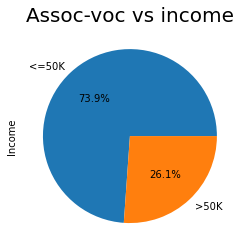

In [21]:
a=df[df['Education']== 'Assoc-voc']
vc = a.Income.value_counts()
a.Income.value_counts().plot(kind='pie',autopct='%1.1f%%',labels=vc.index)
plt.title('Assoc-voc vs income',fontsize= 20)

In [22]:
df['Education']=df['Education'].replace(['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th'],'School')
df['Education']=df['Education'].replace(['HS-grad','Some-college'],'HS Grad')
df['Education']=df['Education'].replace(['Assoc-voc','Assoc-acdm'],'Accociate_Deg_prgm')

df.head(5)


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS Grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,School,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [23]:
df['Marital_status'].value_counts()

Married-civ-spouse       14976
Never-married            10682
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: Marital_status, dtype: int64

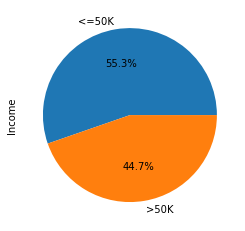

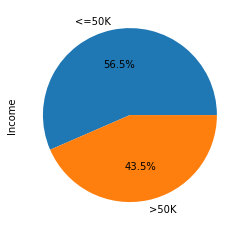

In [24]:
married=['Married-civ-spouse','Married-AF-spouse']
for i in married:
    fig, ax = plt.subplots()
    a=df[df['Marital_status']== i]
    vc = a.Income.value_counts()
    a.Income.value_counts().plot(kind='pie',autopct='%1.1f%%',labels=vc.index)
    plt.tight_layout
    plt.show()

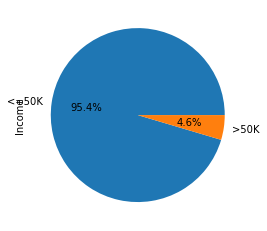

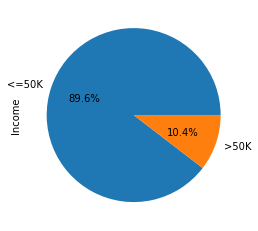

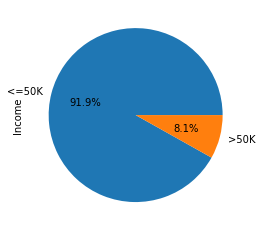

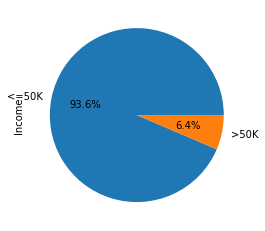

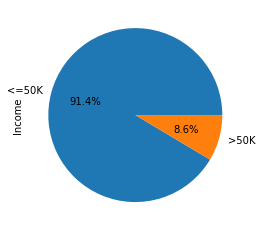

In [24]:
single=['Never-married','Divorced','Married-spouse-absent','Separated','Widowed']
for i in single:
    fig, ax = plt.subplots()
    a=df[df['Marital_status']== i]
    vc = a.Income.value_counts()
    a.Income.value_counts().plot(kind='pie',autopct='%1.1f%%',labels=vc.index)
    plt.tight_layout
    plt.show()
     

- reducing marital status to married and single

In [25]:
df['Marital_status']=df['Marital_status'].replace(['Never-married','Divorced','Separated','Widowed','Married-spouse-absent'],'Single')
df['Marital_status']=df['Marital_status'].replace(['Married-civ-spouse','Married-AF-spouse'],'Married')

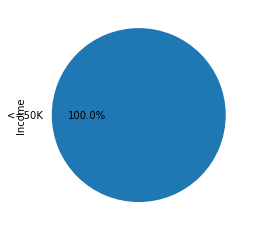

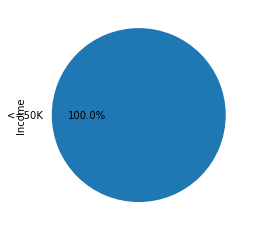

In [26]:
wc=['Never-worked','Without-pay']
for i in wc:
    fig, ax = plt.subplots()
    a=df[df['Workclass']== i]
    vc = a.Income.value_counts()
    a.Income.value_counts().plot(kind='pie',autopct='%1.1f%%',labels=vc.index)
    plt.tight_layout
    plt.show()
     

In [27]:
df['Workclass']=df['Workclass'].replace(['Never-worked','Without-pay'],'Without Pay')

- Similar trends is observed so clubbing them together

### Handling missing values

In [28]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
imputer=imputer.fit(df)
data= imputer.transform(df)

In [29]:
df = pd.DataFrame(data, columns= df.columns)
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS Grad,9,Single,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,School,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [28]:
Categorical = df[['Workclass', 'Education_num', 'Marital_status','Occupation', 'Relationship', 'Race', 'Sex',  'Native_country', 'Income']]

In [29]:
Continous = df[['Age','Capital_gain','Capital_loss','Hours_per_week',]]

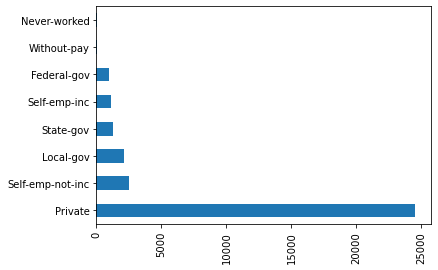

In [30]:
df['Workclass'].value_counts().plot(kind= 'barh')
plt.xticks(rotation=90)
plt.show()


In [31]:
df[df['Workclass']== 'Without-pay']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
1900,65,Without-pay,27012,School,4,Single,Farming-fishing,Unmarried,White,Female,0,0,50,United-States,<=50K
9256,19,Without-pay,344858,HS Grad,9,Single,Farming-fishing,Own-child,White,Male,0,0,20,United-States,<=50K
15532,21,Without-pay,232719,HS Grad,9,Single,Craft-repair,Own-child,Black,Male,0,0,40,United-States,<=50K
15694,22,Without-pay,302347,HS Grad,9,Single,Handlers-cleaners,Own-child,White,Male,4416,0,40,United-States,<=50K
16811,46,Without-pay,142210,HS Grad,9,Married,Machine-op-inspct,Wife,White,Female,0,0,25,United-States,<=50K
20072,65,Without-pay,172949,HS Grad,9,Married,Transport-moving,Husband,White,Male,2414,0,20,United-States,<=50K
21943,52,Without-pay,198262,HS Grad,9,Married,Adm-clerical,Wife,White,Female,0,0,30,United-States,<=50K
22214,19,Without-pay,43887,HS Grad,9,Single,Farming-fishing,Own-child,White,Male,0,0,10,United-States,<=50K
24595,62,Without-pay,170114,Accociate_Deg_prgm,12,Married,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
25499,29,Without-pay,212588,HS Grad,10,Married,Farming-fishing,Own-child,White,Male,0,0,65,United-States,<=50K


<AxesSubplot:>

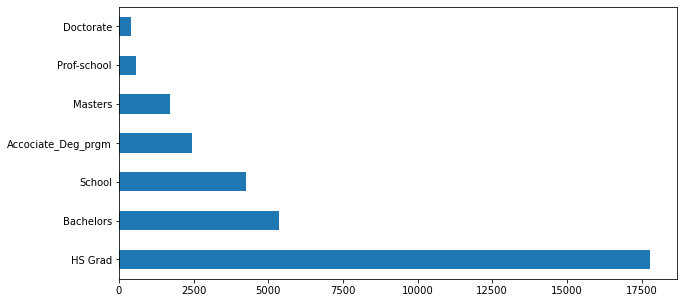

In [32]:
df['Education'].value_counts().plot(kind= 'barh',figsize=(10,5))


majority of the people are high school passouts 

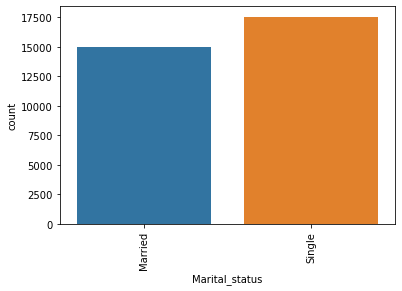

In [33]:
sns.countplot(x= df['Marital_status'])
plt.xticks(rotation=90)
plt.show()

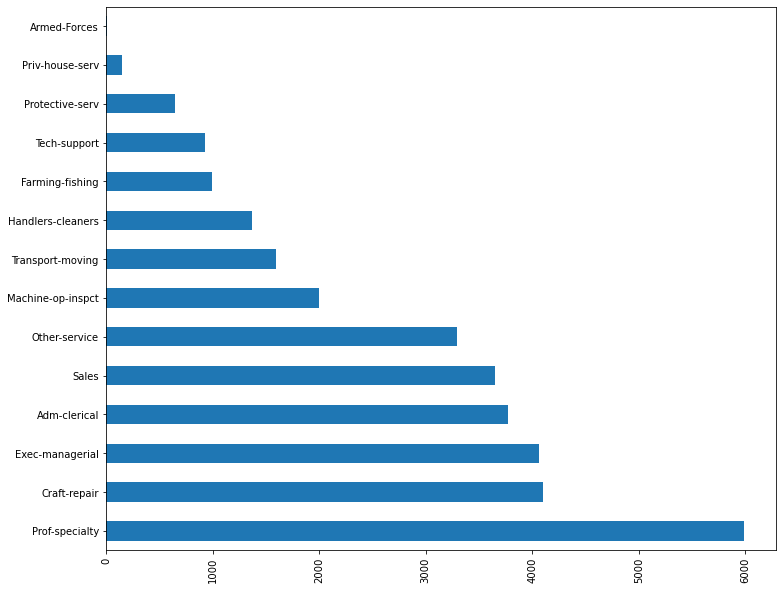

In [34]:
df['Occupation'].value_counts().plot(kind= 'barh',figsize=(12,10))
plt.xticks(rotation=90)
plt.show()

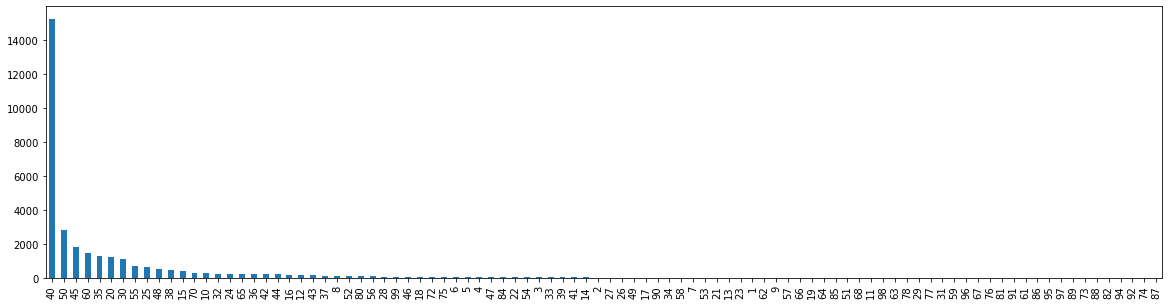

In [35]:
plt.figure(figsize=(20,5))
df['Hours_per_week'].value_counts().plot(kind= 'bar')
plt.xticks(rotation=90)
plt.show()

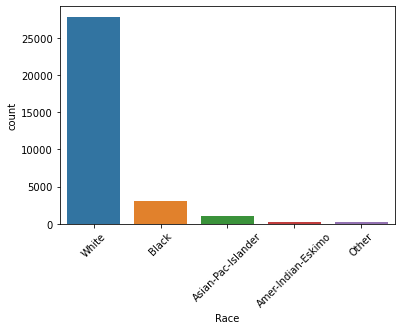

In [36]:
sns.countplot(x= df['Race'])
plt.xticks(rotation=45)
plt.show()

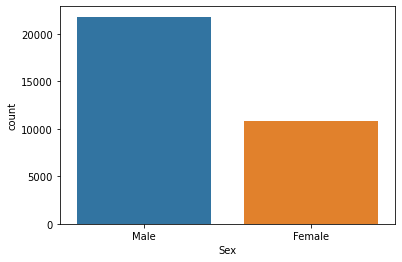

In [37]:
sns.countplot(x= df['Sex'])
plt.show()


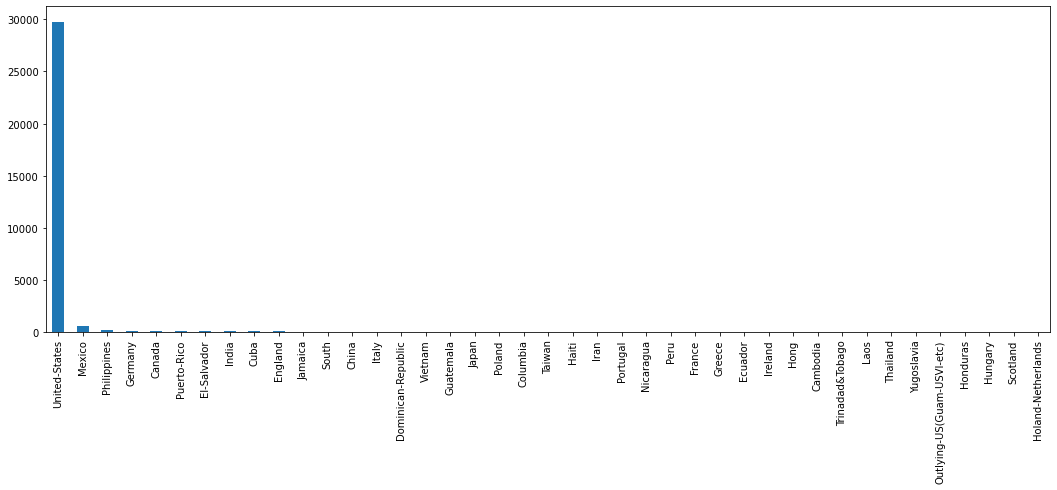

In [38]:
plt.figure(figsize=(18,6))
df['Native_country'].value_counts().plot(kind= 'bar')
plt.xticks(rotation=90)
plt.show()

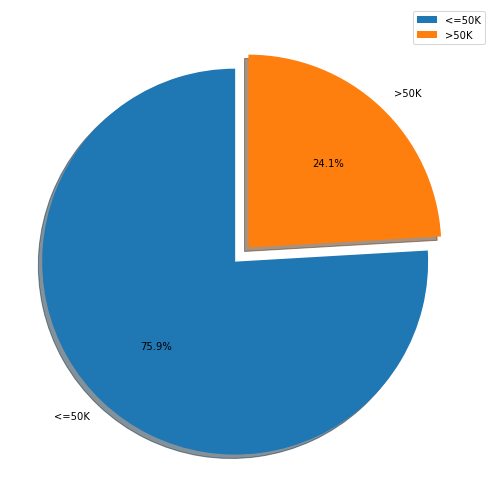

In [39]:
fig, ax = plt.subplots(figsize =(7, 7))
explode = (0.1,0)
vc =df.Income.value_counts()
ax.pie(df.Income.value_counts(),explode=explode,autopct='%1.1f%%',labels=vc.index,startangle=90,shadow= True)
plt.tight_layout()
plt.legend()
plt.show()


- The data is imbalanced which will be handled later on

Text(0, 0.5, 'Number')

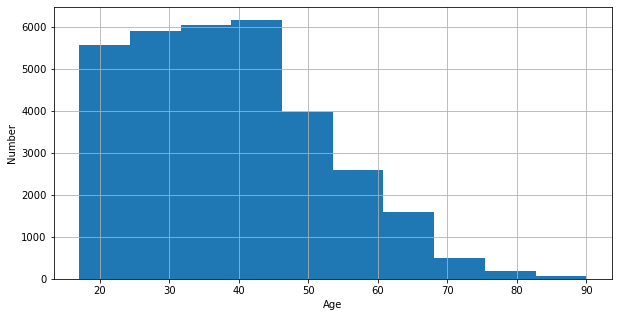

In [40]:
df['Age'].hist(bins=10, figsize=(10,5))
plt.xlabel('Age')
plt.ylabel('Number')


- data is slighlty right skewed

Text(0.5, 1.0, 'Distribution of Fnlwgt')

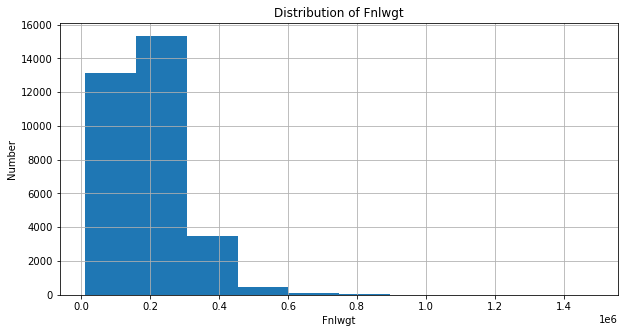

In [41]:
df['Fnlwgt'].hist(bins=10, figsize=(10,5))
plt.xlabel('Fnlwgt')
plt.ylabel('Number')
plt.title('Distribution of Fnlwgt')

- Data is right skewed

<AxesSubplot:>

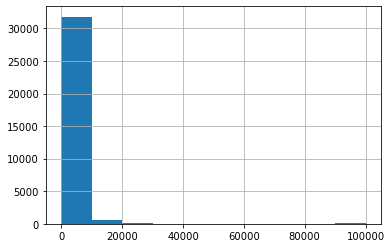

In [42]:
df['Capital_gain'].hist()

<AxesSubplot:>

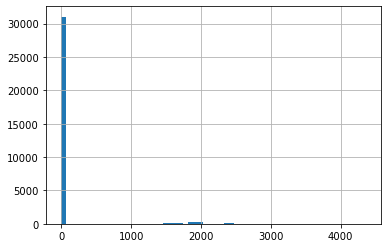

In [43]:
df['Capital_loss'].hist(bins=60)

-the data for both Capital_loss and Capital_gain is 0, the data is heavily right skewed

## Bivariant Analyses

<AxesSubplot:title={'center':'Age VS Income'}, xlabel='Income', ylabel='Age'>

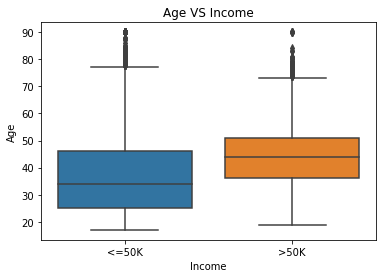

In [44]:
plt.title('Age VS Income')
sns.boxplot(data= df, x='Income',y = 'Age')

-People in the age group 40-50 tend to earn more than

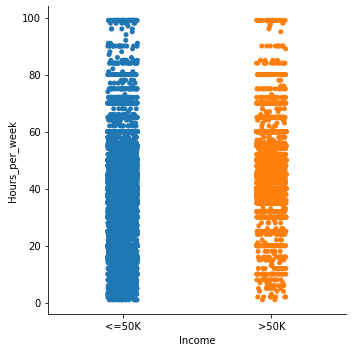

In [45]:
sns.catplot(data= df, x='Income',y = 'Hours_per_week')

-People working for 35-60 hrs tend to earn more than 50k

Text(0.5, 1.0, 'Work class vs income')

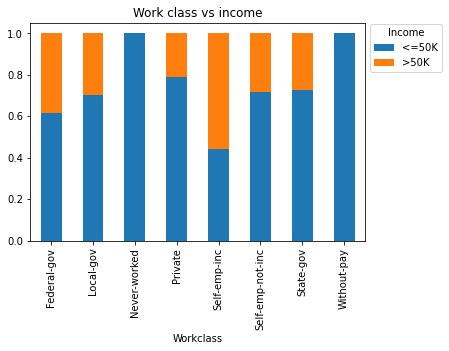

In [46]:
(pd.crosstab(df['Workclass'],df['Income'], 
             normalize='index').plot.bar(stacked=True,rot=90).legend(bbox_to_anchor=(1, 1.02),loc='upper left',title='Income'))
plt.title('Work class vs income')

-Almost 60% people working in Self-emp-inc workclass earn above 50K


Text(0.5, 1.0, 'Education vs Income')

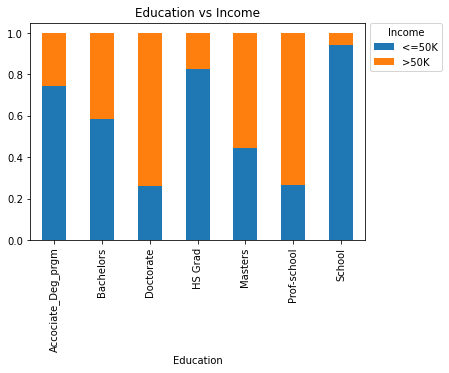

In [47]:
(pd.crosstab(df['Education'],df['Income'], 
             normalize='index').plot.bar(stacked=True,rot=90).legend(bbox_to_anchor=(1, 1.02),loc='upper left',title='Income'))
plt.title('Education vs Income')

- About 80% who earned a doctorate or are from Prof-School tend to earn more tha 50K
- 10% who completed School earned more than 50K 

In [48]:
df_subset=df.loc[(df['Education']=='School')& (df['Income']=='>50K')]

<AxesSubplot:ylabel='Workclass'>

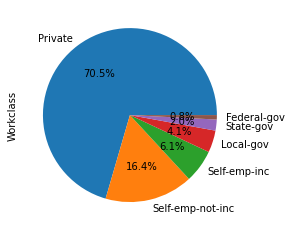

In [49]:
vc=df_subset['Workclass'].value_counts()
df_subset['Workclass'].value_counts().plot(kind='pie',autopct='%1.1f%%',labels=vc.index)

- Of 10% people who were scool pass outs and earned 50K above, 70.5% are in Private workclass

Text(0.5, 1.0, 'Marital_status vs Income')

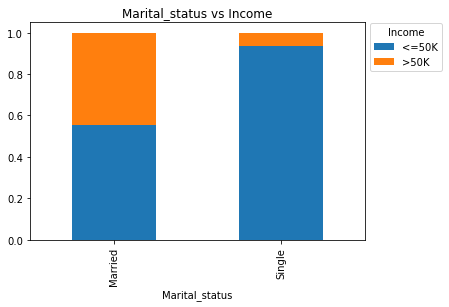

In [50]:
(pd.crosstab(df['Marital_status'],df['Income'], 
             normalize='index').plot.bar(stacked=True,rot=90).legend(bbox_to_anchor=(1, 1.02),loc='upper left',title='Income'))
plt.title('Marital_status vs Income')

- Only about 5% who are Single earn more than 50K

Text(0.5, 1.0, 'Occupation vs Income')

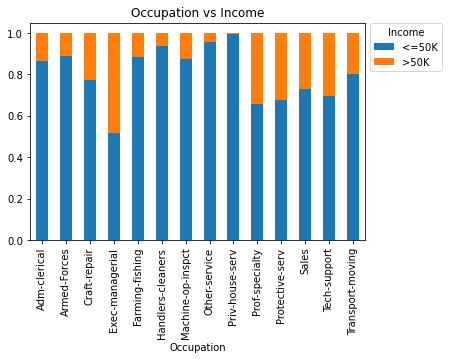

In [51]:
(pd.crosstab(df['Occupation'],df['Income'], 
             normalize='index').plot.bar(stacked=True,rot=90).legend(bbox_to_anchor=(1, 1.02),loc='upper left',title='Income'))
plt.title('Occupation vs Income')

- About 50% who Exec managerial earn more than 50K

Text(0.5, 1.0, 'Race vs Income')

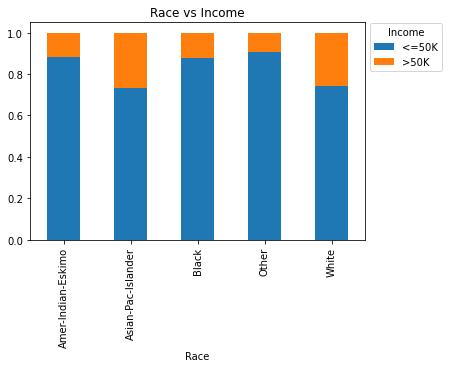

In [52]:
(pd.crosstab(df['Race'],df['Income'], 
             normalize='index').plot.bar(stacked=True,rot=90).legend(bbox_to_anchor=(1, 1.02),loc='upper left',title='Income'))
plt.title('Race vs Income')

Text(0.5, 1.0, 'Sex vs Income')

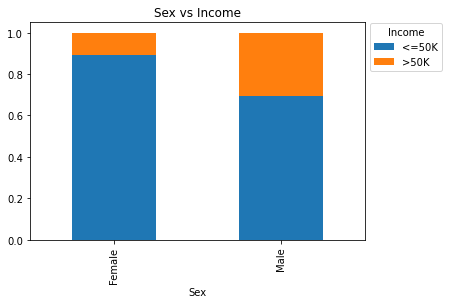

In [53]:
(pd.crosstab(df['Sex'],df['Income'], 
             normalize='index').plot.bar(stacked=True,rot=90).legend(bbox_to_anchor=(1, 1.02),loc='upper left',title='Income'))
plt.title('Sex vs Income')

-About 20% more men are earning >50k

## Encoding

In [30]:
edu = {'Education':{'School':1,'HS Grad':2,'Bachelors':3,'Accociate_Deg_prgm':4,'Masters':5,'Prof-school':6,'Doctorate':7}}
df.replace(edu,inplace=True)


In [31]:
wc={'Workclass':{'Private':2,'Self-emp-not-inc':3,'Local-gov':4,'State-gov':5,'Self-emp-inc':7,'Federal-gov':6,'Without Pay':1}}
df.replace(wc,inplace=True)

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in df.columns:
    if df[i].dtype=='object':
        df[i]=le.fit_transform(df[i].values.reshape(-1,1))

In [34]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,33,3,2925,3,12,0,3,0,4,1,0,0,12,38,0
1,21,2,14085,2,8,1,5,1,4,1,0,0,39,38,0
2,36,2,15335,1,6,0,5,0,2,1,0,0,39,38,0
3,11,2,19354,3,12,0,9,5,2,0,0,0,39,4,0
4,20,2,17699,5,13,0,3,5,4,0,0,0,39,38,0


In [35]:
df.drop('Education_num',axis=1,inplace=True) #dropping as it was a duplicate for Education
df.head()

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,33,3,2925,3,0,3,0,4,1,0,0,12,38,0
1,21,2,14085,2,1,5,1,4,1,0,0,39,38,0
2,36,2,15335,1,0,5,0,2,1,0,0,39,38,0
3,11,2,19354,3,0,9,5,2,0,0,0,39,4,0
4,20,2,17699,5,0,3,5,4,0,0,0,39,38,0


## Checking for outliers

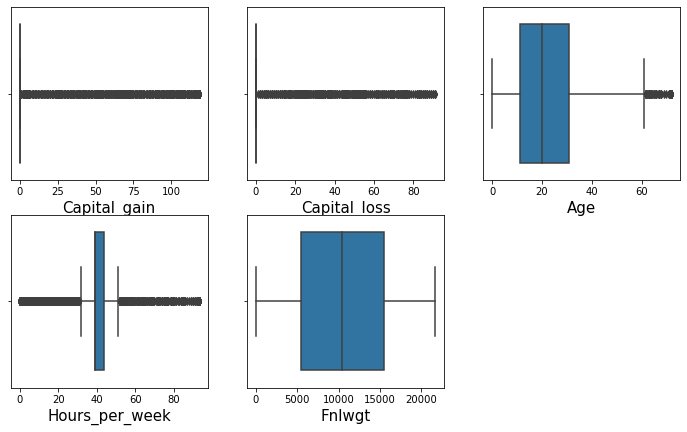

In [36]:
f= df[['Capital_gain','Capital_loss','Age','Hours_per_week','Fnlwgt']]
plt.figure(figsize =(12,7), facecolor='white')
plotnumber = 1
for column in f :
    if plotnumber <= 5:
        ax = plt.subplot(2,3,plotnumber)
        sns.boxplot(f[column])
        plt.xlabel(column,fontsize=15)
        
    
    plotnumber +=1
plt.show()

- Since most of the data in both capital loss and capital gain are outliers, I decided on droping the columns.
- Outliers in Age and Hours_per_week needs to be treated.

In [37]:
df.drop(['Capital_gain','Capital_loss'],axis=1,inplace=True)

## Removing Outliers

In [38]:
import scipy
from scipy.stats import zscore

In [39]:
f= df[['Age','Hours_per_week']]
np.abs(zscore(f)<3).all().all()

False

In [40]:
z=np.abs(zscore(f))

In [41]:
df=df[(z<3).all(axis=1)]
df.shape

(32015, 12)

## Correlation

In [42]:
corr=df.corr()
corr

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
Age,1.000000,0.162617,-0.076185,0.118502,-0.324678,-0.000638,-0.267584,0.028134,0.090932,0.094795,-0.001446,0.245702
Workclass,0.162617,1.000000,-0.039898,0.177899,-0.112123,-0.022472,-0.085093,-0.010529,0.057666,0.107300,0.032569,0.157198
Fnlwgt,-0.076185,-0.039898,1.000000,-0.033836,0.026731,0.001581,0.006495,-0.009356,0.027291,-0.014650,-0.067399,-0.010844
Education,0.118502,0.177899,-0.033836,1.000000,-0.119798,0.088549,-0.116237,0.030863,0.033757,0.170819,0.020220,0.335439
Marital_status,-0.324678,-0.112123,0.026731,-0.119798,1.000000,-0.016524,0.509274,-0.089740,-0.430407,-0.224737,0.004489,-0.446649
Occupation,-0.000638,-0.022472,0.001581,0.088549,-0.016524,1.000000,-0.037173,-0.004787,0.047071,-0.020786,-0.002669,0.034289
Relationship,-0.267584,-0.085093,0.006495,-0.116237,0.509274,-0.037173,1.000000,-0.115762,-0.582636,-0.262193,-0.010436,-0.251090
Race,0.028134,-0.010529,-0.009356,0.030863,-0.089740,-0.004787,-0.115762,1.000000,0.087835,0.044879,0.116533,0.073040
Sex,0.090932,0.057666,0.027291,0.033757,-0.430407,0.047071,-0.582636,0.087835,1.000000,0.238895,0.001600,0.215787
Hours_per_week,0.094795,0.107300,-0.014650,0.170819,-0.224737,-0.020786,-0.262193,0.044879,0.238895,1.000000,0.004069,0.243361


<AxesSubplot:>

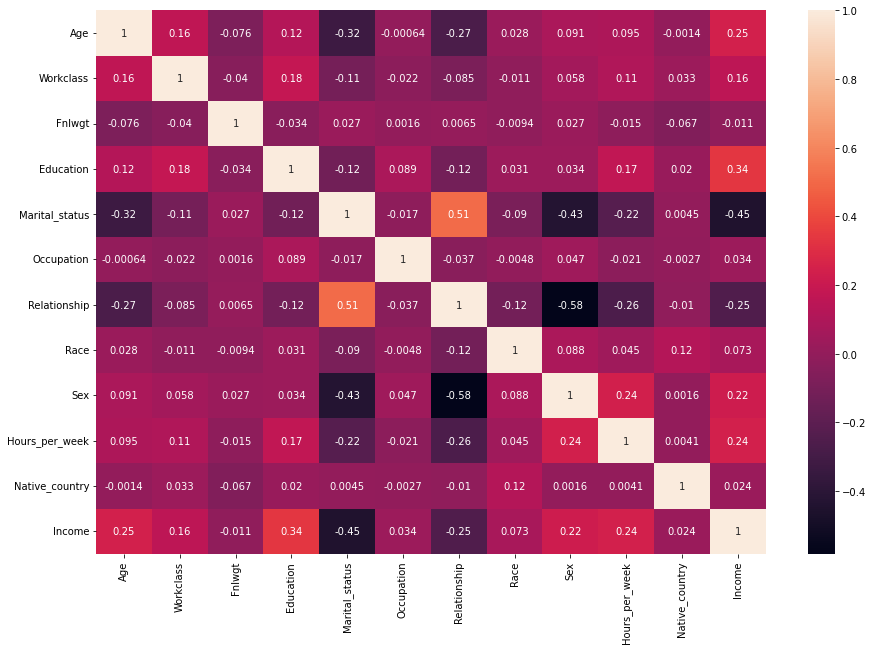

In [43]:
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)

<AxesSubplot:>

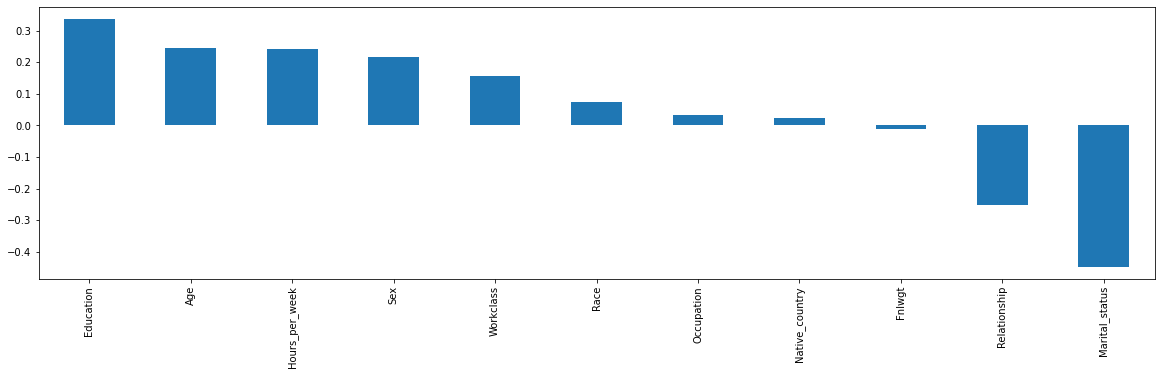

In [44]:
df.drop('Income',axis= 1).corrwith(df.Income).sort_values(ascending= False).plot(kind='bar', figsize = (20,5))


- we can observe features that are positively and negatively correlated.
- Fnlwgt correlation is minimum 

## Skewness

In [45]:
df.skew()

Age               0.473319
Workclass         2.168965
Fnlwgt            0.061234
Education         1.502439
Marital_status   -0.164169
Occupation        0.005348
Relationship      0.778619
Race             -2.429470
Sex              -0.711568
Hours_per_week   -0.370273
Native_country   -4.229485
Income            1.215535
dtype: float64

- skewness is greater than +- 0.5 only in categorical columns, hence we do not require to treat skewness

In [46]:
#Slipping in feature and label
X= df.drop('Income',axis=1)
y= df.Income

## Balancing dataset

In [47]:
from imblearn.over_sampling import SMOTE
#We have to change our dataset into a balanced dataset from an imbalanced dataset.
oversample = SMOTE()
X,y= oversample.fit_resample(X,y)

0    24321
1    24321
Name: Income, dtype: int64


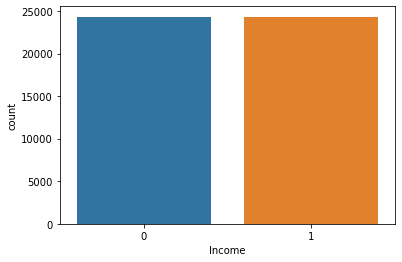

In [48]:
sns.countplot(y)
print(y.value_counts())

## Standardization

In [49]:
from sklearn.preprocessing import StandardScaler

Scaler =StandardScaler()
x= Scaler.fit_transform(X)

In [50]:
x

array([[ 0.80352364,  0.29168104, -1.25184755, ...,  0.66172407,
        -2.77365432,  0.24591437],
       [-0.17572912, -0.51468152,  0.6046883 , ...,  0.66172407,
        -0.15053816,  0.24591437],
       [ 1.04833683, -0.51468152,  0.81263362, ...,  0.66172407,
        -0.15053816,  0.24591437],
       ...,
       [ 0.72191924, -0.51468152, -0.62701344, ...,  0.66172407,
         0.82098634,  0.24591437],
       [-0.01252032, -0.51468152,  1.17312764, ...,  0.66172407,
         0.23807164,  0.24591437],
       [-0.91016869, -0.51468152, -1.04606486, ..., -1.51120391,
        -0.15053816,  0.24591437]])

In [51]:
x = pd.DataFrame(x, index= X.index,columns= X.columns)
x.head()

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,0.803524,0.291681,-1.251848,0.343233,-0.755761,-0.807514,-0.733984,0.390152,0.661724,-2.773654,0.245914
1,-0.175729,-0.514682,0.604688,-0.502196,1.323170,-0.275925,-0.082218,0.390152,0.661724,-0.150538,0.245914
2,1.048337,-0.514682,0.812634,-1.347625,-0.755761,-0.275925,-0.733984,-2.097107,0.661724,-0.150538,0.245914
3,-0.991773,-0.514682,1.481219,0.343233,-0.755761,0.787252,2.524846,-2.097107,-1.511204,-0.150538,-6.007162
4,-0.257334,-0.514682,1.205900,2.034090,-0.755761,-0.807514,2.524846,0.390152,-1.511204,-0.150538,0.245914


- Our data is scaled

## Model Building

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report

In [53]:
#Finding the random state

MaxAcc = 0
MaxRS =0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    rf = RandomForestClassifier()
    rf.fit(x_train,y_train)
    predrf= rf.predict(x_test)
    acc= accuracy_score(y_test,predrf)
    print('accuracy',acc,'random_state',1)
    
    if acc>MaxAcc:
        MaxAcc=acc
        MaxRS= i
        print('accuracy',MaxAcc,'random_state',i)

accuracy 0.8685373625244116 random_state 1
accuracy 0.8685373625244116 random_state 1
accuracy 0.8653510124370439 random_state 1
accuracy 0.8637064446500154 random_state 1
accuracy 0.8687429334977901 random_state 1
accuracy 0.8687429334977901 random_state 4
accuracy 0.8581560283687943 random_state 1
accuracy 0.8633980881899476 random_state 1
accuracy 0.8595950251824442 random_state 1
accuracy 0.8610340219960941 random_state 1
accuracy 0.8663788673039367 random_state 1
accuracy 0.8601089526158906 random_state 1
accuracy 0.8592866687223764 random_state 1
accuracy 0.865762154383801 random_state 1
accuracy 0.8612395929694727 random_state 1
accuracy 0.8667900092506938 random_state 1
accuracy 0.8602117381025799 random_state 1
accuracy 0.8616507349162298 random_state 1
accuracy 0.8626785897831226 random_state 1
accuracy 0.8601089526158906 random_state 1
accuracy 0.8628841607565012 random_state 1
accuracy 0.8616507349162298 random_state 1
accuracy 0.8599033816425121 random_state 1
accuracy 0.8

In [54]:
print('Best accuracy score is',MaxAcc,'Random_state',MaxRS)


Best accuracy score is 0.8710042142049542 Random_state 171


In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=171)


In [56]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predrf= rf.predict(x_test)
print('Accuracy',accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 86.43185088741177
[[6096 1143]
 [ 837 6517]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      7239
           1       0.85      0.89      0.87      7354

    accuracy                           0.86     14593
   macro avg       0.87      0.86      0.86     14593
weighted avg       0.86      0.86      0.86     14593



In [58]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
predlr = lr.predict(x_test)
print('Accuracy',accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy 82.45048996094017
[[5268 1971]
 [ 590 6764]]
              precision    recall  f1-score   support

           0       0.90      0.73      0.80      7239
           1       0.77      0.92      0.84      7354

    accuracy                           0.82     14593
   macro avg       0.84      0.82      0.82     14593
weighted avg       0.84      0.82      0.82     14593



In [59]:
dt =DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt= dt.predict(x_test)
print('Accuracy',accuracy_score(y_test,preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy 81.7926403069965
[[5881 1358]
 [1299 6055]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      7239
           1       0.82      0.82      0.82      7354

    accuracy                           0.82     14593
   macro avg       0.82      0.82      0.82     14593
weighted avg       0.82      0.82      0.82     14593



In [60]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
predkn= knn.predict(x_test)
print('Accuracy',accuracy_score(y_test,predkn)*100)
print(confusion_matrix(y_test,predkn))
print(classification_report(y_test,predkn))

Accuracy 83.43041184129378
[[5813 1426]
 [ 992 6362]]
              precision    recall  f1-score   support

           0       0.85      0.80      0.83      7239
           1       0.82      0.87      0.84      7354

    accuracy                           0.83     14593
   macro avg       0.84      0.83      0.83     14593
weighted avg       0.84      0.83      0.83     14593



### Cross Validation

In [61]:
from sklearn.model_selection import cross_val_score

In [62]:
a = cross_val_score(lr,x,y,cv=19)
print('Cross validation score of Logistic Regression',a.mean())

Cross validation score of Logistic Regression 0.8228294338534494


In [63]:
b = cross_val_score(rf,x,y,cv=18)
print('Cross validation score of Random Forest Classifier',b.mean())

Cross validation score of Random Forest Classifier 0.8632955186180447


In [64]:
c = cross_val_score(dt,x,y,cv=9)
print('Cross validation score of Decision Tree',c.mean())

Cross validation score of Decision Tree 0.8178140182209528


In [65]:
d = cross_val_score(knn,x,y,cv=9)
print('Cross validation score of Decision Tree',d.mean())

Cross validation score of Decision Tree 0.8377755569721845


- On cross validation Random Forest Classifier still holds the best score, so we go with that model

## Hyperparameter tuning

In [86]:
#Number of trees in random forest
n_estimators= [int(x) for x in np.linspace(start=10,stop= 100,num=10)]
#Number of features to consider at every split
max_features=['auto','sqrt','log2']
#Max levels in tree
max_depth=[14,15,16,17]
#Minimum number of samples required to split node
min_samples_split = [2,5]
#The function to measure the quality of a split. 
criterion=['gini','entropy']
bootstrap =[True,False]


In [87]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {'n_estimators': n_estimators,'max_features': max_features,'max_depth':max_depth,'criterion':criterion,'min_samples_split':min_samples_split,'bootstrap':bootstrap}

In [88]:
RCV=RandomizedSearchCV(RandomForestClassifier(),parameters,cv=10,scoring='accuracy')
RCV.fit(x_train,y_train)
RCV.best_params_

{'n_estimators': 80,
 'min_samples_split': 5,
 'max_features': 'log2',
 'max_depth': 17,
 'criterion': 'entropy',
 'bootstrap': True}

In [89]:
type(RCV)

sklearn.model_selection._search.RandomizedSearchCV

In [90]:
RCV.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=17, max_features='log2',
                       min_samples_split=5, n_estimators=80)

In [91]:
RCV_pred = RCV.best_estimator_.predict(x_test)
accuracy_score(y_test,RCV_pred)

0.8615089426437333

- Since the parameters that was set by hyperparameter tuning wasn't doing better(though it may perform better with more trial and error), I decided to go for the earlier model.

## Saving Model

In [92]:
import joblib

In [94]:
joblib.dump(rf,'CensusIncomePrediction.pkl')

['CensusIncomePrediction.pkl']